<center><div style="direction:rtl;font-family:B Lotus, B Nazanin, Tahoma">به نام خدا</div></center>

<h1><center><div style="direction:rtl;font-family:B Lotus, B Nazanin, Tahoma">تمرین عملی 2: طبقه بندی تصاویر Cifar10 با شبکه های کانولوشنالی روی googleColab</div></center></h1>

[![Run in Google Colab](https://github.com/alireza-akhavan/SRU-deeplearning-workshop/blob/master/homework/images/colab.png?raw=1)](https://colab.research.google.com/github/alireza-akhavan/SRU-deeplearning-workshop/blob/master/homework/ex2-conv-cifar10-in-colab.ipynb)

## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">صورت مساله</div>


<div style="direction:rtl;text-align:right;font-family:Tahoma">
با شبکه های کانولوشنالی آشنا شدیم<br>
توصیه می‌شود حتما بعد از تمرین اول این تمرین را حل کنید و قبل از این تمرین نوت بوک زیر را  مرور کنید:
</div>

[06_ConvolutionalNeuralNetwork-Hoda-Keras.ipynb ](https://nbviewer.jupyter.org/github/alireza-akhavan/SRU-deeplearning-workshop/blob/master/06_ConvolutionalNeuralNetwork-Hoda-Keras.ipynb)

<div style="direction:rtl;text-align:right;font-family:Tahoma">
در این تمرین از مجموعه داده تصویری cifar10 استفاده خواهیم کرد.
<br>
خیلی از اوقات ممکنه دسترسی به GPU نداشته باشیم. حخوشبختانه سرویس های آنلاین و رایگانی هستند که توان محاسباتی رایگان در اختیارمان میگذراند. در این تمرین از شما خواسته شده که این نوت بوک را در گوگل کولب اجرا کنید.
<br>
 قبلا در مورد گوگل کولب دو پست آموزشی نوشته شده است که در صورت تمایل به کسب اطلاعات بیشتر میتوانید بخوانید.
    اما برای اجرا این تمرین نیازی به این جزئیات نخواهید داشت.
</div>

[آشنایی با سرویس ابری Google Colab ](http://blog.class.vision/1397/02/google-colab/)

[اتصال مستقیم سرویس کولب (Google Colab) به درایو (Google Drive) از طریق فایل سیستم FUSE ](http://blog.class.vision/1397/04/%D8%A7%D8%AA%D8%B5%D8%A7%D9%84-%D9%85%D8%B3%D8%AA%D9%82%DB%8C%D9%85-%D8%B3%D8%B1%D9%88%DB%8C%D8%B3-%DA%A9%D9%88%D9%84%D8%A8-google-colab-%D8%A8%D9%87-%D8%AF%D8%B1%D8%A7%DB%8C%D9%88-google-drive/)


## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">لود کتابخانه های مورد نیاز </div>
<div style="direction:rtl;text-align:right;font-family:Tahoma">
کتابخانه های مورد نیاز این تمرین لود شده اند
<br>
در صورت نیاز میتوانید کتابخانه های بیشتری لود کنید:
</div>

In [22]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">مجموعه داده ی Cifar10 </div>
<div style="direction:rtl;text-align:right;font-family:Tahoma">
<br>
این مجموعه داده تصاویر رنگی در اندازه ی 32 در 32 و در 10 کلاس مختلف شامل ماشین، کامیون، اسب و ... است که در چارچوب کراس موجود است و از همان استفاده میکنیم.
<br>
اطلاعات بیشتر در مورد این مجموعه داده را از سایت این مجموعه داده میتوانید مطالعه کنید:
<br>
</div>

https://www.cs.toronto.edu/~kriz/cifar.html

In [23]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">نگاهی به مجموعه داده بیندازیم...</div>
<div style="direction:rtl;text-align:right;font-family:Tahoma">
در زیر تصویری که در اندیس 7-ام این مجموعه داده قرار دارد را مشاهده می‌کنیم. این شماره را را به دلخوه عوض کنید و چند تصویر دیگر این مجموعه داده را ببینید.
</div>


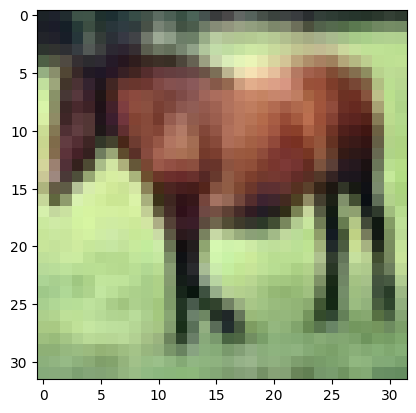

In [24]:
plt.imshow(x_train[7])

# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">سوال 1:</div>
<div style="direction:rtl;text-align:right;font-family:Tahoma">
ماتریس های تصویر را تبدیل به نوع داده ای float32 کنید و مقادیر پیکسل ها را نرمال کنید و بین 0 و 1 بیاورید.
<br>
<b>راهنمایی: </b>
شما باید متد astype را صدا بزنید و در نهایت مقادیر پیکسل ها را تقسیم بر 255 کنید.</div>

In [25]:
# x_train =
# x_test =

# تبدیل داده‌ها به float32 و نرمال‌سازی مقادیر پیکسل‌ها
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# بررسی نتایج نرمال‌سازی
print("بیشترین مقدار پیکسل در x_train:", x_train.max())
print("کمترین مقدار پیکسل در x_train:", x_train.min())
print("نوع داده‌ای x_train:", x_train.dtype)


بیشترین مقدار پیکسل در x_train: 1.0
کمترین مقدار پیکسل در x_train: 0.0
نوع داده‌ای x_train: float32


# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">سوال 2:</div>
<div style="direction:rtl;text-align:right;font-family:Tahoma">
همان طور که میبینید لیبل ها از نوع عددی هستند. آن ها را تبدیل به فرمت one-hot کنید.<br>
</div>


<hr>
<div style="direction:rtl;text-align:right;font-family:Tahoma">
تعدادی از لیبل ها قبل از تبدیل به فرمت one-hot:</div>

In [26]:
y_train[0:10]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3]], dtype=uint8)

In [27]:
# y_train =
# y_test =
from tensorflow.keras.utils import to_categorical

# تبدیل لیبل‌های آموزشی و آزمایشی به فرمت one-hot
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# بررسی نمونه‌ای از لیبل‌ها پس از تبدیل
print("نمونه‌ای از لیبل‌های y_train بعد از تبدیل به one-hot:\n", y_train[:5])


نمونه‌ای از لیبل‌های y_train بعد از تبدیل به one-hot:
 [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


<div style="direction:rtl;text-align:right;font-family:Tahoma">
تعدادی از لیبل ها بعد از تبدیل به فرمت one-hot:</div>

In [7]:
y_train[0:10]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]])

# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">سوال 3:</div>
<div style="direction:rtl;text-align:right;font-family:Tahoma">
یک شبکه کانولوشنالی با معماری زیر بسازید:
<ul>
    <li>
    یک لایه کانولوشنی با32 فیلتر با سایز فیلتر 3x3 و تابع فعالیت relu
    </li>
    <li>
    لایه ی pooling با pool_size=(2,2)
    </li>
    <li>
    یک لایه کانولوشنی با32 فیلتر با سایز فیلتر 3x3 و تابع فعالیت relu
    </li>
    <li>
    لایه ی pooling با pool_size=(2,2)
    </li>
    <li>
    یک لایه کانولوشنی با64 فیلتر با سایز فیلتر 3x3 و تابع فعالیت relu
    </li>
    <li>
    لایه ی pooling با pool_size=(2,2)
    </li>
    <li>
    استفاده از لایه ی Flatten() . به نظرتون چرا؟
    </li>    
    <li>
    یک لایه Dropout با ترخ 0.5.
    </li>
    <li>
    یک لایه softmax برای احتمالات خروجی. به نظرتون این لایه چند نوران میخواهد؟
    </li>    

</ul>
</div>


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),  # تبدیل ویژگی‌های چندبعدی به یک بردار یک‌بعدی

    Dropout(0.5),  # کاهش بیش‌برازش

    Dense(10, activation='softmax')  # تعداد نورون‌ها برابر تعداد کلاس‌ها (10 کلاس) است
])

# نمایش خلاصه معماری مدل
model.summary()




/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,210 (121.91 KB)

 Trainable params: 31,210 (121.91 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),  # تعداد فیلترها از 32 به 64 افزایش یافته است
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),  # لایه کانولوشن جدید اضافه شده
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dropout(0.5),
    Dense(10, activation='softmax')
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">سوال 4:</div>
<div style="direction:rtl;text-align:right;font-family:Tahoma">
مدل را کامپایل کنید و به عنوان optimizer متغیر opt_rms به تابع ارسال کنید. </div>


In [20]:
# opt_rms = keras.optimizers.RMSprop(learning_rate=0.001,decay=1e-6)


from tensorflow.keras.optimizers import RMSprop

# تعریف optimizer
opt_rms = RMSprop(learning_rate=0.001, decay=1e-6)

# کامپایل مدل
model.compile(optimizer=opt_rms,
              loss='categorical_crossentropy',
              metrics=['accuracy'])



# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">سوال 5:</div>
<div style="direction:rtl;text-align:right;font-family:Tahoma">
با فراخوانی متد fit روی مدل آن را آموزش بدهید. برای سادگی25 ایپاک با سایز بچ 64 بزنید.
    <br>
 به عنوان دیتای validation نیز x_test و y_test را ارسال کنید که در هر سری کارایی روی داده های تست اعلام شود.
</div>

In [9]:
history = model.fit(x_train, y_train,
                    epochs=50,  # به جای 25 تعداد ایپاک‌ها را افزایش دهید
                    batch_size=64,
                    validation_data=(x_test, y_test))



Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.2689 - loss: 1.9695 - val_accuracy: 0.4648 - val_loss: 1.4704
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4587 - loss: 1.4898 - val_accuracy: 0.5003 - val_loss: 1.3916
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5343 - loss: 1.3052 - val_accuracy: 0.5505 - val_loss: 1.2543
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5804 - loss: 1.1835 - val_accuracy: 0.6316 - val_loss: 1.0488
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6163 - loss: 1.0996 - val_accuracy: 0.6499 - val_loss: 1.0025
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6347 - loss: 1.0439 - val_accuracy: 0.6254 - val_loss: 1.0403
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6575 - loss: 0.9779 - val_accuracy: 0.6735 - val_loss: 0.9501
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6692 - loss: 0.9451 - val_accuracy: 0

# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">سوال 6:</div>
<div style="direction:rtl;text-align:right;font-family:Tahoma">
شبکه و هایپرپارامترهای این شبکه را به هر نحوی دوست دارید تغییر دهید تا دقت روی دادگان تست را به حداکثر برسانید.
</div>


<div class="alert alert-block alert-info">
<div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma"> دوره مقدماتی یادگیری عمیق<br>علیرضا اخوان پور<br>پنج شنبه، ۱۸ و ۲۵ بهمن ۱۳۹۷<br>
</div>
<a href="http://class.vision">Class.Vision</a> - <a href="http://AkhavanPour.ir">AkhavanPour.ir</a> - <a href="https://github.com/Alireza-Akhavan/">GitHub</a>

</div>

In [28]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dropout(0.6),  # نرخ Dropout را به ۰.۶ تغییر دادیم
    Dense(10, activation='softmax')
])


In [29]:
# opt_rms = keras.optimizers.RMSprop(learning_rate=0.001,decay=1e-6)


from tensorflow.keras.optimizers import RMSprop

# تعریف optimizer
opt_rms = RMSprop(learning_rate=0.001, decay=1e-6)

# کامپایل مدل
model.compile(optimizer=opt_rms,
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [30]:
history = model.fit(x_train, y_train,
                    epochs=50,  # به جای 25 تعداد ایپاک‌ها را افزایش دهید
                    batch_size=64,
                    validation_data=(x_test, y_test))

Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.2388 - loss: 2.0245 - val_accuracy: 0.4295 - val_loss: 1.5965
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4127 - loss: 1.6092 - val_accuracy: 0.4642 - val_loss: 1.5175
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4716 - loss: 1.4660 - val_accuracy: 0.4922 - val_loss: 1.4683
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5052 - loss: 1.3758 - val_accuracy: 0.5826 - val_loss: 1.1900
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5434 - loss: 1.2996 - val_accuracy: 0.5047 - val_loss: 1.4050
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5590 - loss: 1.2540 - val_accuracy: 0.5603 - val_loss: 1.1940
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5756 - loss: 1.1999 - val_accuracy: 0.5846 - val_loss: 1.1845
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5823 - loss: 1.1844 - val_accuracy: 0.

In [31]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

history = model.fit(x_train, y_train,
                    epochs=50,
                    batch_size=64,
                    validation_data=(x_test, y_test),
                    callbacks=[reduce_lr])  # اضافه کردن کاهش نرخ یادگیری به متد fit


Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6829 - loss: 0.9088 - val_accuracy: 0.6976 - val_loss: 0.8741 - learning_rate: 0.0010
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6878 - loss: 0.9066 - val_accuracy: 0.6741 - val_loss: 0.9623 - learning_rate: 0.0010
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6873 - loss: 0.9052 - val_accuracy: 0.6916 - val_loss: 0.9171 - learning_rate: 0.0010
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6824 - loss: 0.9177 - val_accuracy: 0.5737 - val_loss: 1.2806 - learning_rate: 0.0010
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6837 - loss: 0.9223 - val_accuracy: 0.6561 - val_loss: 1.0490 - learning_rate: 0.0010
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6840 - loss: 0.9213 - val_accuracy: 0.6760 - val_loss: 1.0190 - learning_rate: 0.0010
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7126 - loss: 0.8312 - 

Test Accuracy: 0.7368000149726868 
Maximum Test Acuracy During Training:  0.7387999892234802


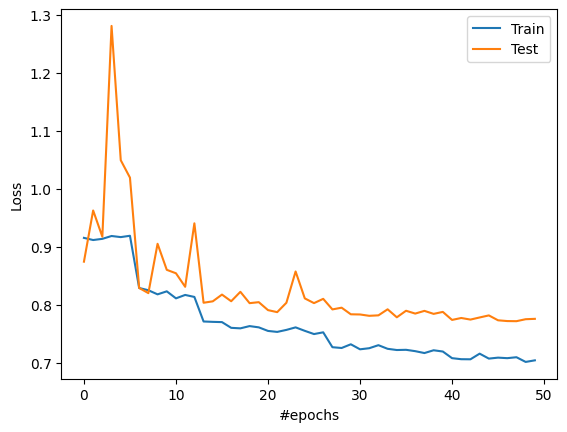

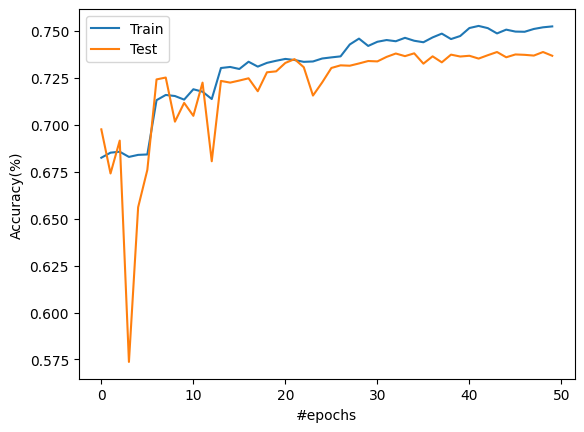

In [32]:
print("Test Accuracy:",history.history['val_accuracy'][-1],
      "\nMaximum Test Acuracy During Training: ",
      max(history.history['val_accuracy']))

plt.figure(1)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')
plt.xlabel('#epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(2)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Test')
plt.xlabel('#epochs')
plt.ylabel('Accuracy(%)')
plt.legend()
plt.show()

In [39]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import LearningRateScheduler

# افزایش داده‌ها با استفاده از ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=15,        # چرخش تصاویر تا 15 درجه
    width_shift_range=0.1,    # تغییر عرض تا 10 درصد
    height_shift_range=0.1,   # تغییر ارتفاع تا 10 درصد
    horizontal_flip=True      # قرینه‌سازی افقی
)
datagen.fit(x_train)

# تعریف مدل
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=x_train.shape[1:], kernel_regularizer=l2(0.001)),
    BatchNormalization(),  # نرمال‌سازی
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dropout(0.6),  # افزایش Dropout به 0.6 برای کاهش بیش‌برازش
    Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.6),  # افزایش Dropout در لایه Dense برای کاهش بیش‌برازش
    Dense(10, activation='softmax')  # 10 نورون برای 10 کلاس خروجی
])

# تعریف optimizer و کامپایل مدل با استفاده از Adam
opt_adam = Adam(learning_rate=0.0001)  # استفاده از Adam با نرخ یادگیری کمتر
model.compile(optimizer=opt_adam, loss='categorical_crossentropy', metrics=['accuracy'])

# تعریف Learning Rate Scheduler برای تنظیم داینامیک نرخ یادگیری
def lr_schedule(epoch):
    if epoch < 10:
        return 0.0001
    elif epoch < 20:
        return 0.00005
    else:
        return 0.00001

lr_scheduler = LearningRateScheduler(lr_schedule)

# آموزش مدل با داده‌افزایی
history = model.fit(
    datagen.flow(x_train, y_train, batch_size=64),
    epochs=50,  # افزایش تعداد epochs برای آموزش بهتر
    validation_data=(x_test, y_test),
    steps_per_epoch=x_train.shape[0] // 64,
    verbose=1,
    callbacks=[lr_scheduler]  # اعمال Learning Rate Scheduler
)


Epoch 1/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 50s 57ms/step - accuracy: 0.1676 - loss: 4.5747 - val_accuracy: 0.3577 - val_loss: 2.3765 - learning_rate: 1.0000e-04
Epoch 2/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 718us/step - accuracy: 0.2344 - loss: 2.9363 - val_accuracy: 0.3586 - val_loss: 2.3768 - learning_rate: 1.0000e-04
Epoch 3/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 35s 44ms/step - accuracy: 0.2442 - loss: 2.6915 - val_accuracy: 0.3855 - val_loss: 2.2555 - learning_rate: 1.0000e-04
Epoch 4/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3281 - loss: 2.4029 - val_accuracy: 0.3854 - val_loss: 2.2549 - learning_rate: 1.0000e-04
Epoch 5/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.2966 - loss: 2.3800 - val_accuracy: 0.4046 - val_loss: 2.1339 - learning_rate: 1.0000e-04
Epoch 6/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 692us/step - accuracy: 0.2188 - loss: 2.3826 - val_accuracy: 0.4039 - val_loss: 2.1369 - learning_rate: 1.0000e-04
Epoch 7/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 35s 44ms/step 